In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# from google.colab import drive
# drive.mount('/content/drive')

In [85]:
raw_data = pd.read_csv("fakenews_data.csv")

In [86]:
raw_data.Polarity[raw_data.Polarity == 'Fake'] = 0
raw_data.Polarity[raw_data.Polarity == 'TRUE'] = 1

In [87]:
raw_data

,Polarity,Text
0,0,Universities Agree with Trump on Immigration\n...
1,0,Chris Pratt responds to body shamers telling h...
2,0,"""Dancing With the Stars"": First couple won the..."
3,0,Brian Cox hosts scientist Postman Pat\n\nProfe...
4,0,London Stock Exchange has dropped Merger with ...
...,...,...
475,1,Jason Witten signs new four-year deal with Dal...
476,1,Google Maps can tell your friends exactly wher...
477,1,Let there be light: German scientists test 'ar...
478,1,Roger Federer beats Frances Tiafoe on return ...


load the three_final_features.csv

In [88]:
final_fts = pd.read_csv("three_final_features.csv")


In [89]:
final_fts.shape #indexes are split and start from 0, change from polarity at 239

(480, 4)

In [90]:
final_fts

,DESPLd,DESWLltd,WORD_PROPERTY_WRDHYPn,Polarity
0,0.000000,0.998218,0.244583,0
1,0.272727,0.221451,0.267995,0
2,0.363636,0.198063,0.471208,0
3,0.272727,0.212835,0.467174,0
4,0.454545,0.225762,0.622575,0
...,...,...,...,...
475,0.176471,0.062359,0.506349,1
476,0.037203,0.000000,0.455246,1
477,0.048029,0.095503,0.592211,1
478,0.352941,0.066419,0.492107,1


In [91]:
with open("list_indexes_features.txt", "r") as f:
  list_indexes = f.read()

# print(list_indexes) list of indexes in this variable

# Logistic Regression using all the 3 features

unique Polairty labels: [0 1]
94% right, missed 7/113


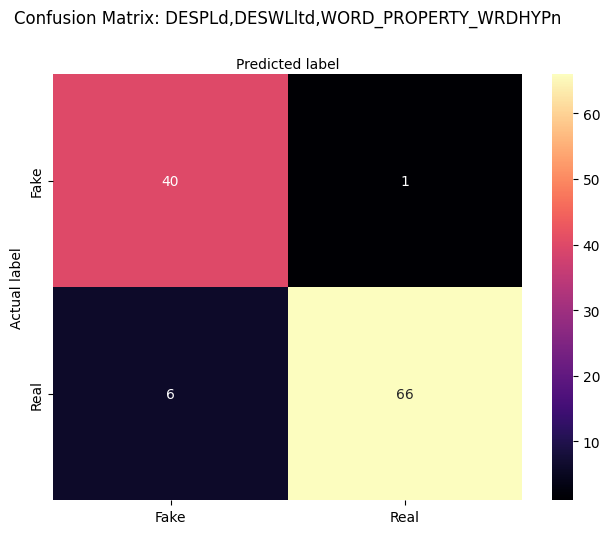

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

regression_fts = final_fts.dropna()
print("unique Polairty labels:", regression_fts.Polarity.unique())


feature_cols = ['DESPLd',	'DESWLltd',	'WORD_PROPERTY_WRDHYPn']
X = regression_fts[feature_cols]
y = regression_fts.Polarity #outcomes 0 or 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logistic_regression = LogisticRegression(random_state=16)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
confussion_matrix = confusion_matrix(y_pred, y_test)

outcomes = ["Fake","Real"]
ticks = np.arange(len(outcomes))

fig, ax = plt.subplots()
plt.xticks(ticks, outcomes)
plt.yticks(ticks, outcomes)
sns.heatmap(pd.DataFrame(confussion_matrix), annot=True, cmap="magma", fmt="g", xticklabels=outcomes, yticklabels=outcomes)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix: DESPLd,DESWLltd,WORD_PROPERTY_WRDHYPn", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


# print(confussion_matrix)

print("94% right, missed 7/113")


In [93]:
from sklearn.metrics import classification_report

scores_3_fts = classification_report(y_test, y_pred, target_names=outcomes)
print(scores_3_fts)

              precision    recall  f1-score   support

        Fake       0.98      0.87      0.92        46
        Real       0.92      0.99      0.95        67

    accuracy                           0.94       113
   macro avg       0.95      0.93      0.93       113
weighted avg       0.94      0.94      0.94       113



In [94]:
from sklearn import model_selection
import pickle

pickle.dump(logistic_regression, open("lg_3_features", "wb"))

# Logistic Regression excluding different features each time

DESWLltd and WORD_PROPERTY_WRDHYPn

unique Polairty labels: [0 1]
excluding the DESPLd feature. 94% right, missed 7/113


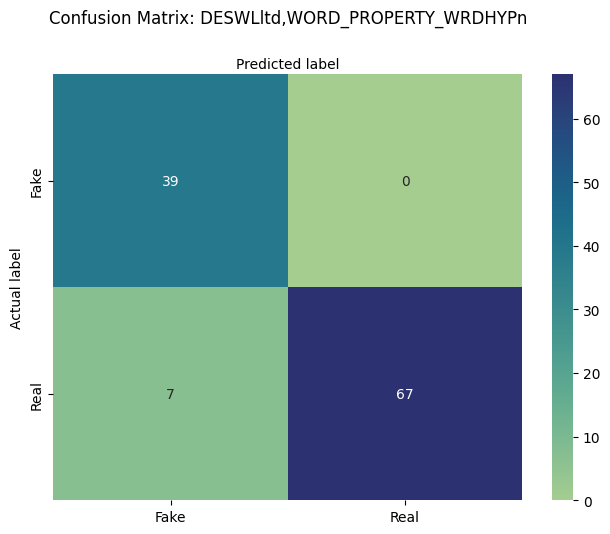

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

regression_fts = final_fts.dropna()
print("unique Polairty labels:", regression_fts.Polarity.unique())


feature_cols = ['DESWLltd',	'WORD_PROPERTY_WRDHYPn']
X = regression_fts[feature_cols]
y = regression_fts.Polarity #outcomes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logistic_regression = LogisticRegression(random_state=16)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
confussion_matrix = confusion_matrix(y_pred, y_test)


outcomes = ["Fake","Real"]
ticks = np.arange(len(outcomes))

fig, ax = plt.subplots()
plt.xticks(ticks, outcomes)
plt.yticks(ticks, outcomes)
sns.heatmap(pd.DataFrame(confussion_matrix), annot=True,cmap="crest", fmt="g", xticklabels=outcomes, yticklabels=outcomes)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix: DESWLltd,WORD_PROPERTY_WRDHYPn", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
# print(confussion_matrix)

print("excluding the DESPLd feature. 94% right, missed 7/113")


In [96]:
scores_DESWLltd_WORD_PROPERTY_WRDHYPn = classification_report(y_test, y_pred, target_names=outcomes)
print(scores_DESWLltd_WORD_PROPERTY_WRDHYPn)

              precision    recall  f1-score   support

        Fake       1.00      0.85      0.92        46
        Real       0.91      1.00      0.95        67

    accuracy                           0.94       113
   macro avg       0.95      0.92      0.93       113
weighted avg       0.94      0.94      0.94       113



In [97]:
pickle.dump(logistic_regression, open("lg_DESWLltd_WORD_PROPERTY_WRDHYPn", "wb"))

DESPLd and	WORD_PROPERTY_WRDHYPn

unique Polairty labels: [0 1]
excluding the DESWLltd feature. 74% right, missed 29/113


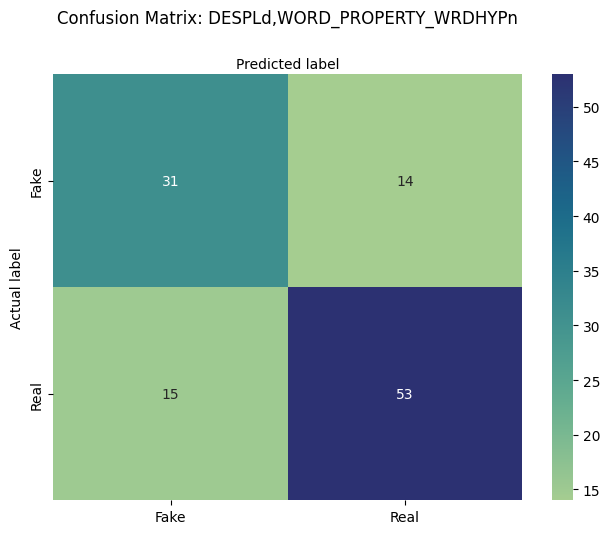

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

regression_fts = final_fts.dropna()
print("unique Polairty labels:", regression_fts.Polarity.unique())


feature_cols = ['DESPLd',	'WORD_PROPERTY_WRDHYPn']
X = regression_fts[feature_cols]
y = regression_fts.Polarity #outcomes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logistic_regression = LogisticRegression(random_state=16)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
confussion_matrix = confusion_matrix(y_pred, y_test)

outcomes = ["Fake","Real"]
ticks = np.arange(len(outcomes))

fig, ax = plt.subplots()
plt.xticks(ticks, outcomes)
plt.yticks(ticks, outcomes)
sns.heatmap(pd.DataFrame(confussion_matrix), annot=True,cmap="crest", fmt="g", xticklabels=outcomes, yticklabels=outcomes)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix: DESPLd,WORD_PROPERTY_WRDHYPn", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# print(confussion_matrix)

print("excluding the DESWLltd feature. 74% right, missed 29/113")

In [99]:
scores_DESPLd_WORD_PROPERTY_WRDHYPn = classification_report(y_test, y_pred, target_names=outcomes)
print(scores_DESPLd_WORD_PROPERTY_WRDHYPn)

              precision    recall  f1-score   support

        Fake       0.69      0.67      0.68        46
        Real       0.78      0.79      0.79        67

    accuracy                           0.74       113
   macro avg       0.73      0.73      0.73       113
weighted avg       0.74      0.74      0.74       113



In [100]:
pickle.dump(logistic_regression, open("lg_DESPLd_WORD_PROPERTY_WRDHYPn", "wb"))

DESPLd and DESWLltd

unique Polairty labels: [0 1]
excluding the WORD_PROPERTY_WRDHYPn feature. 93% right, missed 8/113


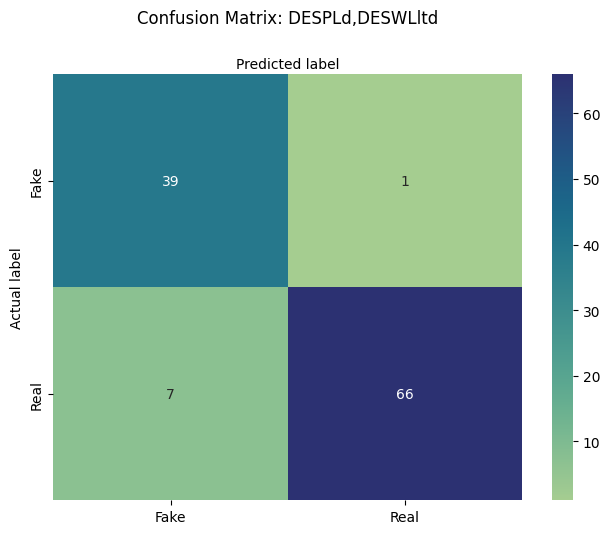

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

regression_fts = final_fts.dropna()
print("unique Polairty labels:", regression_fts.Polarity.unique())


feature_cols = ['DESPLd',	'DESWLltd']
X = regression_fts[feature_cols]
y = regression_fts.Polarity #outcomes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logistic_regression = LogisticRegression(random_state=16)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
confussion_matrix = confusion_matrix(y_pred, y_test)

outcomes = ["Fake","Real"]
ticks = np.arange(len(outcomes))

fig, ax = plt.subplots()
plt.xticks(ticks, outcomes)
plt.yticks(ticks, outcomes)
sns.heatmap(pd.DataFrame(confussion_matrix), annot=True, cmap="crest", fmt="g", xticklabels=outcomes, yticklabels=outcomes)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix: DESPLd,DESWLltd", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# print(confussion_matrix)

print("excluding the WORD_PROPERTY_WRDHYPn feature. 93% right, missed 8/113")



In [102]:
scores_DESPLd_DESWLltd = classification_report(y_test, y_pred, target_names=outcomes)
print(scores_DESPLd_DESWLltd)

              precision    recall  f1-score   support

        Fake       0.97      0.85      0.91        46
        Real       0.90      0.99      0.94        67

    accuracy                           0.93       113
   macro avg       0.94      0.92      0.92       113
weighted avg       0.93      0.93      0.93       113



In [103]:
pickle.dump(logistic_regression, open("lg_DESPLd_DESWLltd", "wb"))

# Logistic Regression using only our OP feature

DESWLltd

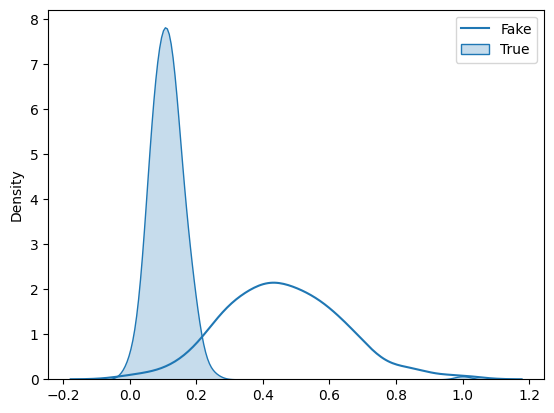




unique Polairty labels: [0 1]
Just using the DESWLltd feature. 95.5% right, missed 5/113


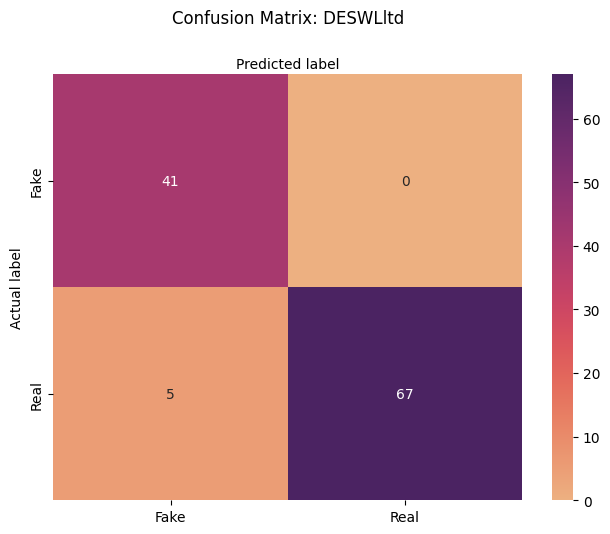

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

regression_fts = final_fts.dropna()
print("unique Polairty labels:", regression_fts.Polarity.unique())


feature_cols = ['DESWLltd']
X = regression_fts[feature_cols]
y = regression_fts.Polarity #outcomes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logistic_regression = LogisticRegression(random_state=16)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
confussion_matrix = confusion_matrix(y_pred, y_test)

outcomes = ["Fake","Real"]
ticks = np.arange(len(outcomes))

fig, ax = plt.subplots()
plt.xticks(ticks, outcomes)
plt.yticks(ticks, outcomes)
sns.heatmap(pd.DataFrame(confussion_matrix), annot=True, cmap="flare", fmt="g", xticklabels=outcomes, yticklabels=outcomes)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix: DESWLltd", y = 1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# print(confussion_matrix)

print("Just using the DESWLltd feature. 95.5% right, missed 5/113")

In [105]:
scores_DESWLltd = classification_report(y_test, y_pred, target_names=outcomes)
print(scores_DESWLltd)

              precision    recall  f1-score   support

        Fake       1.00      0.89      0.94        46
        Real       0.93      1.00      0.96        67

    accuracy                           0.96       113
   macro avg       0.97      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



In [106]:
pickle.dump(logistic_regression, open("lg_DESWLltd", "wb"))

In [107]:

'''

small crossvalidation to make sure model is stableand std bt the scores , lucky distr.

data augmentation - + at the end with the generation model, feed the model with new elements

method to input some text and see the prediction irt,
automatically add fake news text to the data


this is quant but we need qualitative

SMOTE libary for DAug

name of the file and template of the acl file - subsections things

qualitative vs quantitative studies

'''

'\n\nsmall crossvalidation to make sure model is stableand std bt the scores , lucky distr.\n\ndata augmentation - + at the end with the generation model, feed the model with new elements\n\nmethod to input some text and see the prediction irt,\nautomatically add fake news text to the data\n\n\nthis is quant but we need qualitative\n\nSMOTE libary for DAug\n\nname of the file and template of the acl file - subsections things\n\nqualitative vs quantitative studies\n\n'